### Homework 3: Advanced Pandas and Introductory Plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

**Problem 1**: Loading a data file.

Below, load in the data from the `spotify.csv` file.  Assign it to a variable `spotify` below.  

In [3]:
spotify = pd.read_csv('../data/spotify.csv', index_col=0)
spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


**Problem 2**: Who is the most frequently occurring artist in the data?  

In [5]:
spotify['artist'].value_counts().head(1) #Drizzy

Drake    16
Name: artist, dtype: int64

**Problem 3**: Create a histogram for the `tempo` column.

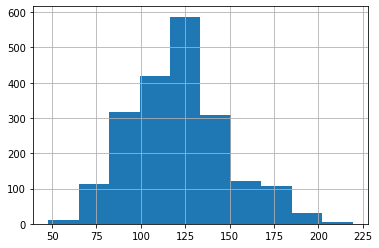

In [6]:
spotify['tempo'].hist();

**Problem 4**: Create a scatterplot of `tempo` vs. `danceability`.  Do these features seem related?

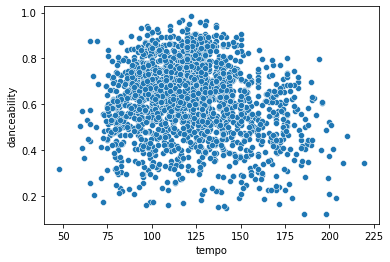

In [7]:
sns.scatterplot(data = spotify, x = 'tempo', y = 'danceability');

**Problem 5**: Load in the `cell_phone_churn.csv` data and assign as `churn` below.

This dataset contains customer information from a telecommunications company about customer churn.  A customer is *churned* if they leave the provider.

In [9]:
churn = pd.read_csv('../data/cell_phone_churn.csv')
churn.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Problem 6**: What percentage of customers were churned?

In [12]:
churn['churn'].value_counts(normalize = True) # 14.5%

False    0.855086
True     0.144914
Name: churn, dtype: float64

**Problem 7**: How do customers who has a voicemail plan and those who did not compare in terms of percent churned?

In [13]:
churn.groupby('vmail_plan')['churn'].mean() # those without a plan seem to have 16% churn vs 8.6%

vmail_plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64

**Problem 8**: Draw a barplot to represent the number of customers by the number of customer service calls these customers made.  

<AxesSubplot: xlabel='custserv_calls', ylabel='count'>

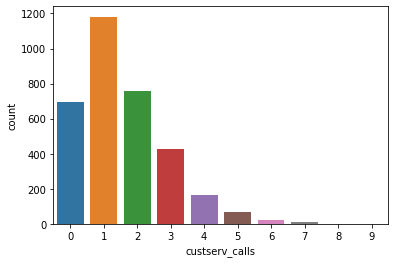

In [15]:
sns.countplot(data = churn, x = 'custserv_calls')

**Problem 9**: Draw boxplots for international minutes by customers who were churned and those that were not.  Are there any differences between these groups? 

<AxesSubplot: xlabel='churn', ylabel='intl_mins'>

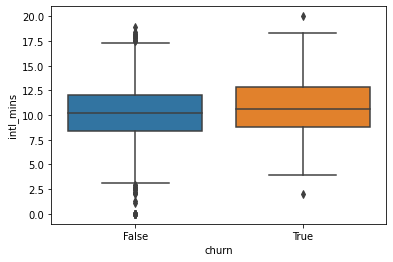

In [17]:
sns.boxplot(data = churn, x = 'churn', y = 'intl_mins')

**Income by College Major**

Below, a dataset from Nate Silver's 538 blog is shown on college majors and income. [link](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/)

In [18]:
url1 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/'
url2 = 'college-majors/recent-grads.csv'
url = url1 + url2
df538 = pd.read_csv(url)
df538.head(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50


**Problem 10**: Assign the columns of the data as a list below.

In [19]:
cols = df538.columns.tolist()
cols[:5]

['Rank', 'Major_code', 'Major', 'Total', 'Men']

**Problem 11**: Set the index of `df538` as `Major`.

In [20]:
df538.set_index('Major')

,Rank,Major_code,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Major,,,,,,,,,,,,,,,,,,,,
PETROLEUM ENGINEERING,1,2419,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
MINING AND MINERAL ENGINEERING,2,2416,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
METALLURGICAL ENGINEERING,3,2415,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
NAVAL ARCHITECTURE AND MARINE ENGINEERING,4,2417,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
CHEMICAL ENGINEERING,5,2405,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZOOLOGY,169,3609,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
EDUCATIONAL PSYCHOLOGY,170,5201,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
CLINICAL PSYCHOLOGY,171,5202,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622


**Problem 12**: Create a horizontal bar chart of the median salary by major.

<AxesSubplot: ylabel='Major'>

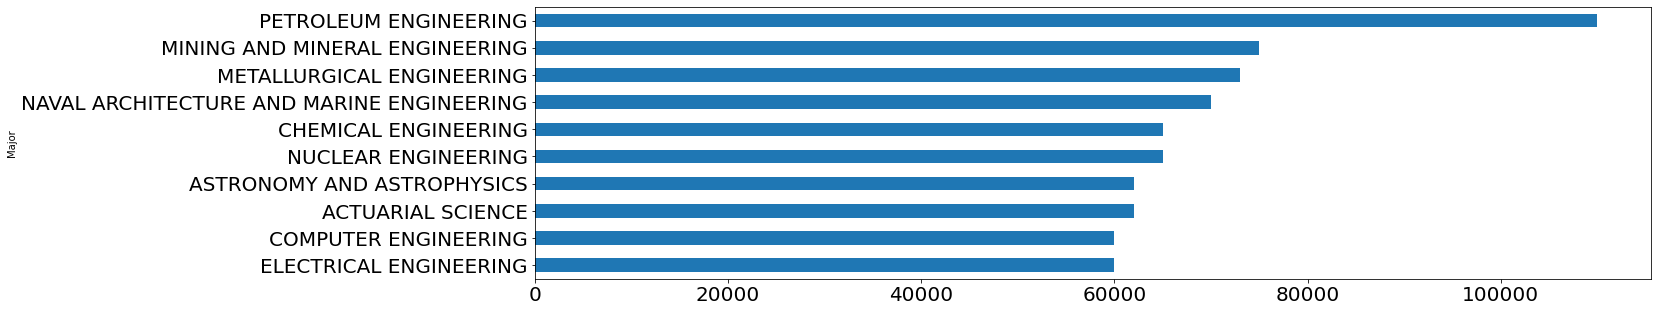

In [28]:
df538.groupby('Major')['Median'].mean().sort_values().tail(10).plot(kind = 'barh', figsize = (20, 5), fontsize = 20)

**Problem 13**: Load in the `gapminder.csv` file and assign as `gapminder_df` below.  This data comes from the Gapminder organization and contains information on countries GDP and Life Expectancy.

In [29]:
gapminder_df = pd.read_csv('../data/gapminder_all.csv')
gapminder_df.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


**Problem 14**: What is the average GDP for each continent?

**Problem 15**: Create a scatter plot for GDP vs. Life Expectancy for the data from 2002.  Include a title and x and y labels.

#### Exploring your own data

Now, head over to the website `kaggle.com` and locate a dataset of interest to you from the [datasets](https://www.kaggle.com/datasets?fileType=csv).  Download a dataset and load it in to your notebook below. Be careful that you don't select a dataset that is too large (>10 GB), and don't spend too much time trying to find the perfect dataset.  

The goal here is to use our techniques from `pandas` and `matplotlib` to explore the data.  Once you have the data loaded, you are to use summaries and plots to explore the data.  Create three plots of your data that contain important insights.  Be sure to label your axes and add appropriate titles to these plots.

#### Styling `pandas`

Chris Moffit has a nice blog about practical uses of Python in a business setting.  In one article, he discusses many more approaches to formatting and styling of DataFrame's. Head over to the article [here](https://pbpython.com/styling-pandas.html) and read it completely.  Use his tips on adding `sparklines` to install the `sparklines` library and demonstrate its use on the titanic dataset from `seaborn` below.  

Also, select one other tip for styling that you enjoy.  Create a markdown cell and write a brief summary of the technique, followed by a demonstration using the `titanic` DataFrame.

In [1]:
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
titanic = sns.load_dataset('titanic')
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
